## Test modules during dev


In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
import sys
sys.path.append('../modules/')

In [4]:
%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

2024-09-29 13:01:09.244599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 13:01:09.244622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 13:01:09.245861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
#dtree = datasets.read_filtered_datatree()
#dtree = datasets.calculate_magnitudes(dtree)

## Load data for different simulations and prepare it with right variables and non-dims.

In this step all the variables and extra dimensions may be created that were not originally present. 
Each input and output variable gets its own containing variable (e.g. if top and bottom layer were two separate inputs, then in this step they may get separated out). 
Other examples might be that rotated variables, or magnitudes become their own variables in this step. 

In [5]:
#DT = datasets.SimulationData(simulation_names=['P2L', 'DG'], filter_scales=['50','100','200','400'])
DT = datasets.SimulationData(simulation_names=['P2L'], filter_scales=['50','100','200','400'])

Initializing data sequence.


In [11]:
DT.preprocess_simulation_data(window_size=1)

In [12]:
DT.simulation_data

DataTree('None', parent=None)
└── DataTree('P2L')
    ├── DataTree('50')
    │       Dimensions:                      (Time: 7200, xh: 150, yh: 200, zl: 2, Xn: 1,
    │                                         Yn: 1, zi: 3)
    │       Coordinates:
    │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
    │         * xh                           (xh) float64 1kB 4.0 12.0 ... 1.196e+03
    │         * yh                           (yh) float64 2kB 4.0 12.0 ... 1.596e+03
    │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
    │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables: (12/40)
    │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dvdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           ...                           ...
    │           dvdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dvdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdx_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           dhdy_widened_rotated_nondim  (Time, zl, yh, xh, Xn, Yn) float64 3GB dask.array<chunksize=(36, 2, 200, 150, 1, 1), meta=np.ndarray>
    │           uphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 200, 150), meta=np.ndarray>
    │           vphp_rotated_nondim          (Time, zl, yh, xh) float64 3GB dask.array<chunksize=(36, 2, 200, 150), meta=np.ndarray>
    │       Attributes:
    │           simulation_name:  P2L
    │           filter_scale:     50
    │           source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
    │           description:      Dataset for P2L experiment at 50 km resolution
    ├── DataTree('100')
    │       Dimensions:                      (Time: 7200, xh: 60, yh: 80, zl: 2, Xn: 1,
    │                                         Yn: 1, zi: 3)
    │       Coordinates:
    │         * Time                         (Time) object 58kB 0001-01-11 00:00:00 ... 0...
    │         * xh                           (xh) float64 480B 10.0 30.0 ... 1.19e+03
    │         * yh                           (yh) float64 640B 10.0 30.0 ... 1.59e+03
    │         * zl                           (zl) float64 16B 1.031e+03 1.033e+03
    │         * zi                           (zi) float64 24B 1.03e+03 1.032e+03 1.034e+03
    │       Dimensions without coordinates: Xn, Yn
    │       Data variables: (12/40)
    │           dudx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 553MB dask.array<chunksize=(36, 2, 80, 60, 1, 1), meta=np.ndarray>
    │           dvdx_widened                 (Time, zl, yh, xh, Xn, Yn) float64 553MB dask.array<chunksize=(36, 2, 80, 60, 1, 1), meta=np.ndarray>
    │           dudy_widened                 (Time, zl, yh, xh, Xn, Yn) float64 553MB dask.array<chunksize=(36, 2, 80, 60, 1, 1), meta=np.ndarray>
    │  

## ML data
Go from simulation data to batches. 
In this step things like dropping extra points, masking of data etc happen. 

In [13]:
# inputs = ['dudx_widened',  
#           'dvdx_widened', 
#          'dudy_widened',
#          'dvdy_widened',
#          'dhdx_widened',
#          'dhdy_widened',
#          'filter_scale']

inputs = ['dudx',  
          'dvdx', 
         'dudy',
         'dvdy',
         'dhdx',
         'dhdy',
         'filter_scale']
          
outputs = ['uphp','vphp']

ML_DT_train = datasets.MLDataset(simulation_data=DT,input_variables=inputs,
                                 output_variables=outputs, time_range=slice(0, 6480))
ML_DT_test = datasets.MLDataset(simulation_data=DT,input_variables=inputs,
                                 output_variables=outputs, time_range=slice(6480, None))

In [20]:
ML_DT_train.create_xr_ML_variables(37)

choose_ml_variables took: 0.0021 seconds
Time subsampling took: 0.0346 seconds
Horizontal subsampling took: 0.0168 seconds
h_mask_ml_variables took: 0.0703 seconds
stack_physical_dimensions took: 0.6147 seconds
will load upto: 1.85328 gb
load took: 203.6865 seconds
drop_nans took: 1.2999 seconds
Seed set as:42
randomize_along_points took: 2.6121 seconds
Picked: 3888000points
pick_uniform_points took: 0.0035 seconds
concat_datatree_nodes took: 0.7849 seconds
randomize_concatenated_ml_dataset took: 2.9203 seconds
generate_batches took: 0.0001 seconds


In [33]:
ML_DT_test.create_xr_ML_variables(5)

choose_ml_variables took: 0.0030 seconds
Time subsampling took: 0.0223 seconds
Horizontal subsampling took: 0.0119 seconds
h_mask_ml_variables took: 0.0694 seconds
stack_physical_dimensions took: 0.0947 seconds
will load upto: 0.20592 gb
load took: 27.5888 seconds
drop_nans took: 0.1203 seconds
Seed set as:42
randomize_along_points took: 0.1541 seconds
Picked: 432000points
pick_uniform_points took: 0.0037 seconds
concat_datatree_nodes took: 0.0534 seconds
randomize_concatenated_ml_dataset took: 0.1853 seconds
generate_batches took: 0.0001 seconds


In [34]:
len(ML_DT_train.ml_batches), len(ML_DT_test.ml_batches) 

(37, 5)

In [38]:
print(len(ML_DT_train.ml_batches[0].points))
print(len(ML_DT_test.ml_batches[0].points))

420324
345600


### Convert these xbatcher batches to processed ones for training

This needs to take care of extra dims, like Xn,Yn.

In [39]:
import jax.numpy as jnp

In [64]:
batch_xr = ML_DT_train.ml_batches[0]

In [65]:
batch_xr

<xarray.Dataset> Size: 44MB
Dimensions:       (points: 420324)
Coordinates:
  * points        (points) object 3MB MultiIndex
  * Time          (points) object 3MB 0050-04-14 00:00:00 ... 0055-01-08 00:0...
  * xh            (points) float64 3MB 196.0 760.0 170.0 ... 810.0 440.0 4.0
  * yh            (points) float64 3MB 260.0 120.0 1.13e+03 ... 280.0 452.0
  * zl            (points) float64 3MB 1.033e+03 1.033e+03 ... 1.033e+03
Data variables:
    dudx          (points) float64 3MB 1.053e-08 -6.8e-08 ... 2.236e-08
    dvdx          (points) float64 3MB -1.451e-08 4.633e-08 ... -8.187e-07
    dudy          (points) float64 3MB 9.792e-09 3.873e-09 ... 2.112e-07
    dvdy          (points) float64 3MB -1.048e-08 4.035e-08 ... -1.224e-08
    dhdx          (points) float64 3MB -2.684e-05 6.678e-06 ... -0.0002243
    dhdy          (points) float64 3MB -0.000214 2.389e-06 ... 0.000248 7.23e-05
    filter_scale  (points) float64 3MB 5e+04 4e+05 1e+05 ... 1e+05 4e+05 5e+04
    uphp          (points) float32 2MB -0.000218 0.02012 ... -1.162 0.004982
    vphp          (points) float32 2MB 0.0007637 -0.0182 ... -0.9192 0.03476
Attributes:
    simulation_name:  P2L
    filter_scale:     50
    source:           gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/r...
    description:      Dataset for P2L experiment at 50 km resolution

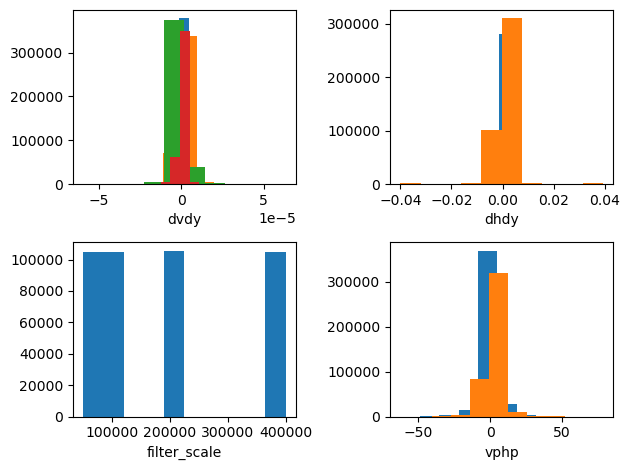

In [66]:
plt.subplot(221)
batch_xr.dudx.plot.hist();
batch_xr.dvdx.plot.hist();
batch_xr.dudy.plot.hist();
batch_xr.dvdy.plot.hist();

plt.subplot(222)
batch_xr.dhdx.plot.hist();
batch_xr.dhdy.plot.hist();

plt.subplot(223)
batch_xr.filter_scale.plot.hist();

plt.subplot(224)
batch_xr.uphp.plot.hist();
batch_xr.vphp.plot.hist();

plt.tight_layout()

In [67]:
# Define the variables and assign normalizations 
normalize_data_dic = {
    'dudx': ([], 1e-6),  # scalar value
    'dvdx': ([], 1e-6),
    'dudy': ([], 1e-6),
    'dvdy': ([], 1e-6),
    'dhdx': ([], 1e-3),
    'dhdy': ([], 1e-3),
    'filter_scale': ([], 140e3),
    'uphp': ([], 4.),
    'vphp': ([], 4.)
}

ds_norm = xr.Dataset(normalize_data_dic)

In [68]:
def normalize_ds(ds,ds_norm):
    return ds/ds_norm

def preprocess_batch(batch: xr.Dataset, input_channels, output_channels): 
    batch = normalize_ds(batch, ds_norm)
    #X = jnp.asarray(batch[input_channels].to_array().transpose(...,'variable').data)
    
    X_xr = batch[input_channels].to_stacked_array("input_features", sample_dims=['points'])
    y_xr = batch[output_channels].to_array().transpose(...,'variable')

    X = jnp.asarray(X_xr.data)
    y = jnp.asarray(y_xr.data)
    Xp = jnp.asarray(np.ones_like(y))

    batch_out = {'X':X, 'y':y, 'Xp':Xp}
    return batch_out
    
class MLData: 
    def __init__(self, ML_dataset, input_channels, output_channels):
        self.input_channels = input_channels
        self.output_channels = output_channels
        
        # Preprocess the entire dataset
        self.preprocessed_data = []
        for batch in ML_dataset.ml_batches:
            batch_out = preprocess_batch(batch, input_channels, output_channels)
            # if normalize:
            #     mean = np.mean(X)
            #     std = np.std(X)
            #     X = normalize_batch(X, mean, std)
            self.preprocessed_data.append(batch_out)

    def get_batches(self):
        for batch_out in self.preprocessed_data:
            yield batch_out

In [69]:
batch = preprocess_batch(batch_xr, 
                       inputs,outputs)

In [70]:
batch

{'X': Array([[ 1.0526044e-02, -1.4514513e-02,  9.7923186e-03, ...,
         -2.6844634e-02, -2.1400882e-01,  3.5714287e-01],
        [-6.7997567e-02,  4.6326745e-02,  3.8734232e-03, ...,
          6.6775559e-03,  2.3887106e-03,  2.8571429e+00],
        [-5.8468442e+00, -1.9832775e-01,  7.1960652e-01, ...,
          8.1364322e-01, -1.7674984e-01,  7.1428573e-01],
        ...,
        [-1.5249454e+00, -2.2096229e+00,  2.3828201e+00, ...,
          2.8077599e-01, -6.5013397e-01,  7.1428573e-01],
        [ 4.8752226e-02,  2.0758353e-01, -2.0891859e-01, ...,
          3.0477334e-02,  2.4800491e-01,  2.8571429e+00],
        [ 2.2355340e-02, -8.1871259e-01,  2.1124074e-01, ...,
         -2.2429240e-01,  7.2298303e-02,  3.5714287e-01]], dtype=float32),
 'y': Array([[-5.4488057e-05,  1.9091308e-04],
        [ 5.0307037e-03, -4.5487820e-03],
        [-1.1817842e+00,  2.5317121e-01],
        ...,
        [-3.9771217e-01, -4.0653202e-01],
        [-2.9057884e-01, -2.2979173e-01],
        [ 1.24557

In [82]:
train_ML_data = MLData(ML_DT_train, inputs, outputs)
test_ML_data = MLData(ML_DT_test, inputs, outputs)

In [83]:
len(train_ML_data.preprocessed_data), len(test_ML_data.preprocessed_data)

(37, 5)

In [84]:
for batch_out in train_ML_data.get_batches():
    print("Input (X) batch shape:", batch_out['X'].shape)
    print("Output (y) batch shape:", batch_out['y'].shape)
    
    # If you want to view a sample of the data
    #print("Sample X:", batch_out['X'])  # First sample of the batch
    #print("Sample y:", batch_out['y'])  # Corresponding label/target
    break  # Remove break to print more batches

Input (X) batch shape: (420324, 7)
Output (y) batch shape: (420324, 2)


In [85]:
for batch_out in test_ML_data.get_batches():
    print("Input (X) batch shape:", batch_out['X'].shape)
    print("Output (y) batch shape:", batch_out['y'].shape)
    
    # If you want to view a sample of the data
    #print("Sample X:", batch_out['X'])  # First sample of the batch
    #print("Sample y:", batch_out['y'])  # Corresponding label/target
    break  # Remove break to print more batches

Input (X) batch shape: (345600, 7)
Output (y) batch shape: (345600, 2)


In [86]:
train_ML_data.get_batches()

<generator object MLData.get_batches at 0x7a06d36bb100>

In [87]:
ML_data_combo = {'train_gen':train_ML_data, 'test_gen':test_ML_data}

In [88]:
ML_data_combo

{'train_gen': <__main__.MLData at 0x7a06887ec470>,
 'test_gen': <__main__.MLData at 0x7a06d365bf20>}

In [89]:
for batch_out in ML_data_combo['train_gen'].get_batches():
    print("Input (X) batch shape:", batch_out['X'].shape)
    print("Output (y) batch shape:", batch_out['y'].shape)
    
    # If you want to view a sample of the data
    #print("Sample X:", batch_out['X'])  # First sample of the batch
    #print("Sample y:", batch_out['y'])  # Corresponding label/target
    break  # Remove break to print more batches

Input (X) batch shape: (420324, 7)
Output (y) batch shape: (420324, 2)


## The ML part


In [90]:
ANN_model = ML_classes.PointwiseANN(num_in=7,shape=[36,36,2])

In [91]:
ANN_model.count_parameters()

1694


In [92]:
regress_sys = ML_classes.AnnRegressionSystem(ANN_model)

In [96]:
%%time 
regress_sys.train_system(ML_data_combo, num_epoch=21, print_freq=2)

Train loss step 0:  1.3535796001150802 test loss: 0.9967072606086731
Train loss step 2:  0.6019506792764406 test loss: 0.5505036830902099
Train loss step 4:  0.41796448826789856 test loss: 0.4035323798656464
Train loss step 6:  0.34646190501548146 test loss: 0.34137057065963744
Train loss step 8:  0.3087802738756747 test loss: 0.30747830867767334
Train loss step 10:  0.28824126559334834 test loss: 0.28787007331848147
Train loss step 12:  0.2718709731424177 test loss: 0.2732537090778351
Train loss step 14:  0.26363533574181636 test loss: 0.26534401178359984
Train loss step 16:  0.25199820584542043 test loss: 0.2588971972465515
Train loss step 18:  0.2467575238363163 test loss: 0.2536180317401886
Train loss step 20:  0.24618707637529116 test loss: 0.24688165187835692
CPU times: user 7min 25s, sys: 3.32 s, total: 7min 29s
Wall time: 2min 26s


In [99]:
%%time 
regress_sys.train_system(ML_data_combo, num_epoch=41, print_freq=2)

At epoch 22. Train loss :  0.2395197346403792 test loss: 0.2438329875469208
At epoch 24. Train loss :  0.23714647180325277 test loss: 0.24151033759117127
At epoch 26. Train loss :  0.2354062799666379 test loss: 0.2569022476673126
At epoch 28. Train loss :  0.23373790367229566 test loss: 0.2381289929151535
At epoch 30. Train loss :  0.22928621760896734 test loss: 0.2357122391462326
At epoch 32. Train loss :  0.22758920772655591 test loss: 0.231535604596138
At epoch 34. Train loss :  0.22603230057535945 test loss: 0.2299609512090683
At epoch 36. Train loss :  0.22718300650248657 test loss: 0.23644362092018129
At epoch 38. Train loss :  0.22372553759330027 test loss: 0.22720284163951873
At epoch 40. Train loss :  0.22484365669456688 test loss: 0.2302194207906723
At epoch 42. Train loss :  0.22095298726816434 test loss: 0.22664979100227356
At epoch 44. Train loss :  0.22030164986043363 test loss: 0.22364368438720703
At epoch 46. Train loss :  0.2182220244729841 test loss: 0.223888182640075

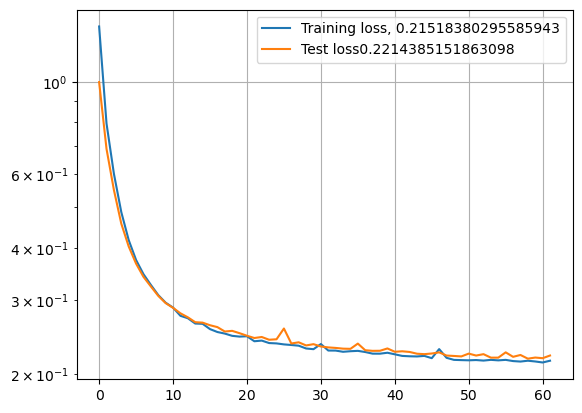

In [100]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.grid()
plt.yscale('log')
plt.legend()